## Run Setup

In [1]:
## check the current working directory
import os
os.chdir("../")
project_dir = os.getcwd()
project_dir

## Import libraries

In [2]:
import pandas as pd
import altair as alt
import streamlit as st
import matplotlib.pyplot as plt

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Define necessary functions

In [3]:
# get name of dataframe (which is required)
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# get shape of dataframe
def print_shape(df):
    df_name = get_df_name(df)
    print(f'shape of the df({df_name}):', df.shape)

# change names in the dataframe    
def change_cols(df):
    cols = df.columns.to_list()
    cols = list(map(lambda x: x.replace(' ', '_').replace('-', '_'), cols))
    df.columns = cols
    return df


## COVID-19 Data for UK

## UK does not have any States/Provinces but directly has Countries/Districts

##### Data Source: https://coronavirus.data.gov.uk/

##### We have 2 csv files
1. Cases - data of registered cases
2. Deaths - data of deceased

## Read Data

In [4]:
df_cases = pd.read_csv(project_dir+'/datasets/coronavirus_cases_latest.csv', parse_dates=['Specimen date'])

## Understand Data

In [5]:
print_shape(df_cases)

shape of the df(df_cases): (52781, 11)


In [6]:
df_cases.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-07-23,0,0.0,0.0,255740,255038.0,702.0,456.9
1,South West,E12000009,Region,2020-07-23,0,NaN,NaN,13020,NaN,NaN,232.5
2,South East,E12000008,Region,2020-07-23,0,NaN,NaN,34873,NaN,NaN,381.8
3,London,E12000007,Region,2020-07-23,0,NaN,NaN,34791,NaN,NaN,390.6
4,East of England,E12000006,Region,2020-07-23,0,NaN,NaN,24337,NaN,NaN,392.5


In [7]:
df_cases = change_cols(df_cases)

In [8]:
df_cases = df_cases.sort_values(by='Specimen_date')
df_cases.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Previously_reported_daily_cases,Change_in_daily_cases,Cumulative_lab_confirmed_cases,Previously_reported_cumulative_cases,Change_in_cumulative_cases,Cumulative_lab_confirmed_cases_rate
52780,York,E06000014,Lower tier local authority,2020-01-30,1,NaN,NaN,1,NaN,NaN,0.5
52777,England,E92000001,Nation,2020-01-30,2,2.0,0.0,2,2.0,0.0,0.0
52779,York,E06000014,Upper tier local authority,2020-01-30,1,NaN,NaN,1,NaN,NaN,0.5
52778,Yorkshire and The Humber,E12000003,Region,2020-01-30,1,NaN,NaN,1,NaN,NaN,0.0
52776,Chiltern,E07000005,Lower tier local authority,2020-02-03,1,NaN,NaN,1,NaN,NaN,1.0


# Prepare Data

In [9]:
df_cases.shape

(52781, 11)

In [10]:
df_cases.Area_name.value_counts()

Sheffield      282
Birmingham     282
Manchester     276
Leeds          274
Liverpool      274
              ... 
Ryedale         63
South Hams      50
West Devon      44
North Devon     40
Torridge        34
Name: Area_name, Length: 351, dtype: int64

In [11]:
## Remove duplicate entries
df_cases = df_cases.drop_duplicates(subset=['Specimen_date', 'Area_name'])
df_cases = df_cases.reset_index()
df_cases.drop('index', axis=1, inplace=True)
df_cases.shape

(38181, 11)

In [12]:
df_cases.Area_name.value_counts()

England                     158
South East                  153
London                      152
East Midlands               149
Yorkshire and The Humber    148
                           ... 
Rutland                      60
South Hams                   50
West Devon                   44
North Devon                  40
Torridge                     34
Name: Area_name, Length: 351, dtype: int64

In [13]:
df_cases.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Previously_reported_daily_cases,Change_in_daily_cases,Cumulative_lab_confirmed_cases,Previously_reported_cumulative_cases,Change_in_cumulative_cases,Cumulative_lab_confirmed_cases_rate
0,York,E06000014,Lower tier local authority,2020-01-30,1,NaN,NaN,1,NaN,NaN,0.5
1,England,E92000001,Nation,2020-01-30,2,2.0,0.0,2,2.0,0.0,0.0
2,Yorkshire and The Humber,E12000003,Region,2020-01-30,1,NaN,NaN,1,NaN,NaN,0.0
3,Chiltern,E07000005,Lower tier local authority,2020-02-03,1,NaN,NaN,1,NaN,NaN,1.0
4,Buckinghamshire,E10000002,Upper tier local authority,2020-02-03,1,NaN,NaN,1,NaN,NaN,0.2


In [14]:
df_cases.isna().sum()

Area_name                                   0
Area_code                                   0
Area_type                                   0
Specimen_date                               0
Daily_lab_confirmed_cases                   0
Previously_reported_daily_cases         38023
Change_in_daily_cases                   38023
Cumulative_lab_confirmed_cases              0
Previously_reported_cumulative_cases    38023
Change_in_cumulative_cases              38023
Cumulative_lab_confirmed_cases_rate         0
dtype: int64

In [15]:
df_cases.drop(['Previously_reported_daily_cases', 'Change_in_daily_cases',
              'Previously_reported_cumulative_cases', 'Change_in_cumulative_cases'],
             axis=1, inplace=True)
df_cases.isna().sum()

Area_name                              0
Area_code                              0
Area_type                              0
Specimen_date                          0
Daily_lab_confirmed_cases              0
Cumulative_lab_confirmed_cases         0
Cumulative_lab_confirmed_cases_rate    0
dtype: int64

In [16]:
df_cases.tail()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate
38176,Epping Forest,E07000072,Lower tier local authority,2020-07-23,0,482,367.6
38177,Colchester,E07000071,Lower tier local authority,2020-07-23,0,716,371.9
38178,Chelmsford,E07000070,Lower tier local authority,2020-07-23,0,738,416.8
38179,Stroud,E07000082,Lower tier local authority,2020-07-23,0,259,217.6
38180,England,E92000001,Nation,2020-07-23,0,255740,456.9


In [17]:
unique_area_names = df_cases.Area_name.unique().tolist()

In [18]:
unique_area_ = unique_area_names[0]
unique_area_

'York'

In [19]:
df_out = pd.DataFrame(columns=df_cases.columns)
df_helper = df_cases.loc[df_cases.Area_name==unique_area_]
df_helper.shape

(118, 7)

In [20]:
df_helper = df_helper[df_helper.Cumulative_lab_confirmed_cases == df_helper.Cumulative_lab_confirmed_cases.max()]
df_helper.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate
37537,York,E06000014,Lower tier local authority,2020-07-20,2,916,436.4
38033,York,E06000014,Lower tier local authority,2020-07-23,0,916,436.4


In [21]:
df_helper.sort_values(by='Specimen_date', inplace=True)
df_helper.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate
37537,York,E06000014,Lower tier local authority,2020-07-20,2,916,436.4
38033,York,E06000014,Lower tier local authority,2020-07-23,0,916,436.4


In [22]:
df_helper = df_helper.tail(1)
df_helper.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate
38033,York,E06000014,Lower tier local authority,2020-07-23,0,916,436.4


In [23]:
df_out = df_out.append(df_helper, ignore_index=True)
df_out.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate
0,York,E06000014,Lower tier local authority,2020-07-23,0,916,436.4


In [24]:
df_out = pd.DataFrame(columns=df_cases.columns)
for area in unique_area_names:
    df_helper = df_cases.loc[df_cases.Area_name==area]
    df_helper = df_helper[df_helper.Cumulative_lab_confirmed_cases == df_helper.Cumulative_lab_confirmed_cases.max()]
    df_helper.sort_values(by='Specimen_date', inplace=True)
    df_helper = df_helper.tail(1)
    df_out = df_out.append(df_helper, ignore_index=True)

del df_helper  
df_out.shape

(351, 7)

In [25]:
df_out.Area_name.nunique()

351

In [26]:
df_out.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate
0,York,E06000014,Lower tier local authority,2020-07-23,0,916,436.4
1,England,E92000001,Nation,2020-07-23,0,255740,456.9
2,Yorkshire and The Humber,E12000003,Region,2020-07-23,0,31077,567.1
3,Chiltern,E07000005,Lower tier local authority,2020-07-23,0,293,305.4
4,Buckinghamshire,E10000002,Upper tier local authority,2020-07-23,0,1721,318.7


## Top 10 affected Counties

In [27]:
# alt.data_transformers.enable('default', max_rows=df_cases.shape[0])
areas_top_10 = df_out.sort_values(by='Cumulative_lab_confirmed_cases', ascending=False)[:10]
areas_top_10 = areas_top_10.sort_values(by='Cumulative_lab_confirmed_cases', ascending=False)
areas_top_10 = areas_top_10.reset_index()
areas_top_10.drop('index', axis=1, inplace=True)
alt.Chart(areas_top_10).mark_bar().encode(x='max(Cumulative_lab_confirmed_cases):Q', y=alt.Y('Area_name:N', sort='-x'))

alt.Chart(...)

In [28]:
## Population source google

Population = [56000000, 7300000, 9180000, 8980000, 5940000, 5910000, 6240000, 4810000, 2660000, 5620000]
areas_top_10['Population'] = Population
areas_top_10


,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate,Population
0,England,E92000001,Nation,2020-07-23,0,255740,456.9,56000000
1,North West,E12000002,Region,2020-07-23,0,44678,612.7,7300000
2,South East,E12000008,Region,2020-07-23,0,34873,381.8,9180000
3,London,E12000007,Region,2020-07-23,0,34791,390.6,8980000
4,Yorkshire and The Humber,E12000003,Region,2020-07-23,0,31077,567.1,5940000
5,West Midlands,E12000005,Region,2020-07-23,0,26479,448.7,5910000
6,East of England,E12000006,Region,2020-07-23,0,24337,392.5,6240000
7,East Midlands,E12000004,Region,2020-07-23,0,22820,475.0,4810000
8,North East,E12000001,Region,2020-07-23,0,15263,574.2,2660000
9,South West,E12000009,Region,2020-07-23,0,13020,232.5,5620000


In [29]:
areas_top_10_copy = areas_top_10.copy()

## Geomap

<img src="TAB.png">

In [30]:
## in Thousands
areas_top_10['Population'] = areas_top_10['Population']/100000
areas_top_10['Cumulative_lab_confirmed_cases'] = areas_top_10['Cumulative_lab_confirmed_cases']/1000
areas_top_10.head()

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate,Population
0,England,E92000001,Nation,2020-07-23,0,255.74,456.9,560.0
1,North West,E12000002,Region,2020-07-23,0,44.678,612.7,73.0
2,South East,E12000008,Region,2020-07-23,0,34.873,381.8,91.8
3,London,E12000007,Region,2020-07-23,0,34.791,390.6,89.8
4,Yorkshire and The Humber,E12000003,Region,2020-07-23,0,31.077,567.1,59.4


In [31]:
import numpy as np
import seaborn as sns

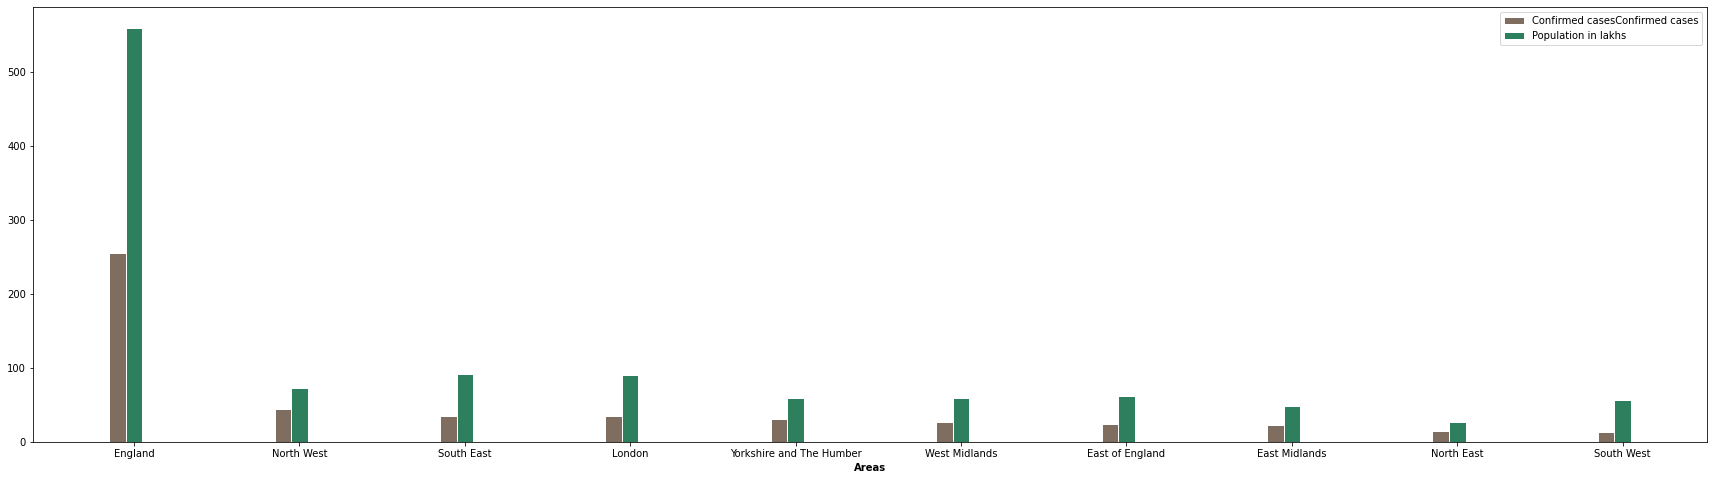

In [32]:
plt.figure(figsize=(30,8))

barWidth = 0.1

bar1 = areas_top_10['Cumulative_lab_confirmed_cases']
bar2 = areas_top_10['Population']


r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Confirmed casesConfirmed cases')
plt.bar(r2, bar2, color='#2d7f5e', width=barWidth, edgecolor='white', label='Population in lakhs')

plt.xlabel('Areas', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], areas_top_10['Area_name'])


plt.legend()
plt.show()





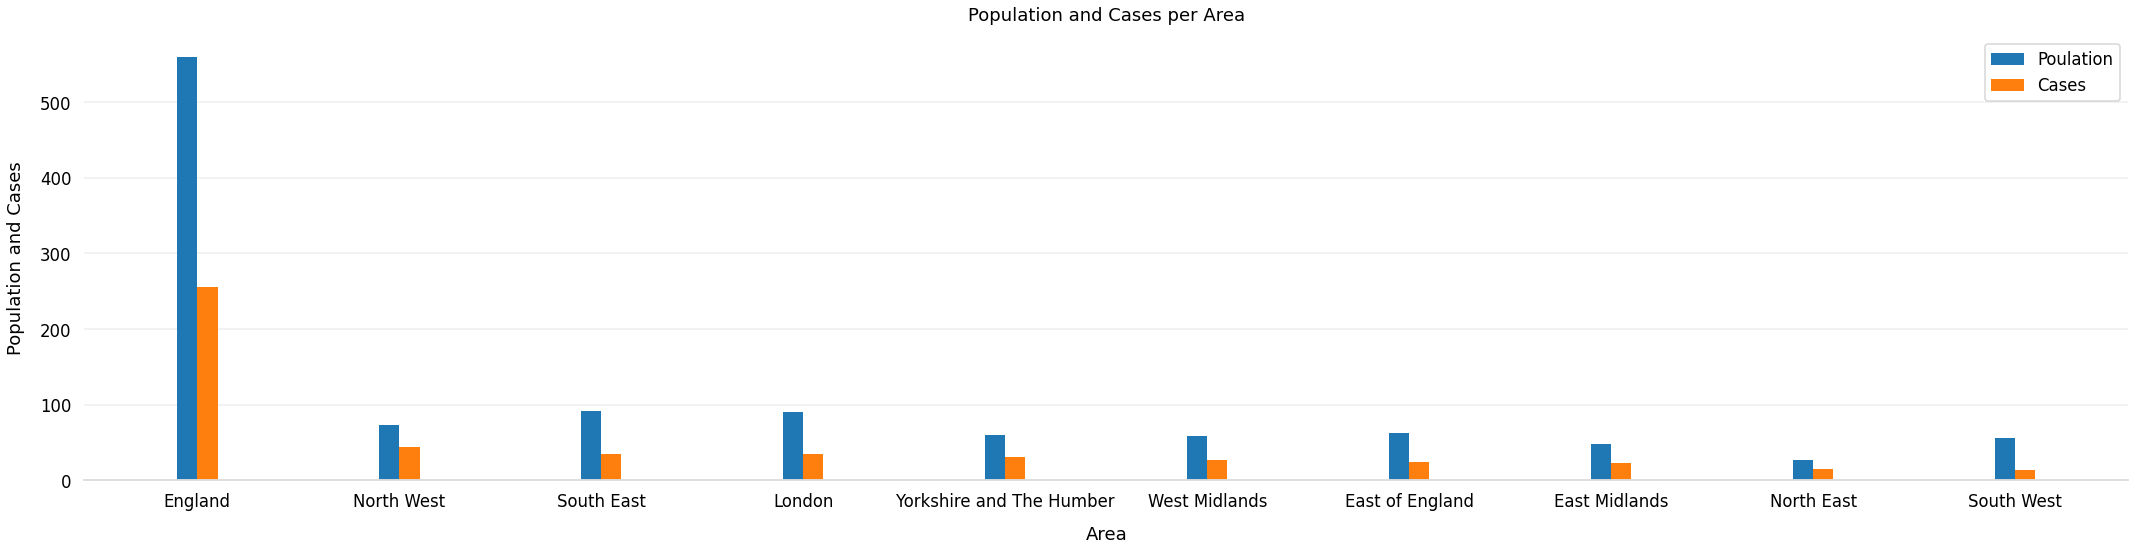

In [33]:
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

# Create a grouped bar chart, with Area as the x-axis
# and Area as the variable we're grouping on so there
# are two bars per Area.
fig, ax = plt.subplots(figsize=(30,8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our Area.
x = np.arange(len(areas_top_10.Area_name.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.1

b1 = ax.bar(x, areas_top_10.Population,
            width=bar_width, label='Poulation')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, areas_top_10.Cumulative_lab_confirmed_cases,
            width=bar_width, label='Cases')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(areas_top_10.Area_name.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Area', labelpad=15)
ax.set_ylabel('Population and Cases', labelpad=15)
ax.set_title('Population and Cases per Area', pad=15)

fig.tight_layout()

In [34]:
df_out.shape

(351, 7)

In [35]:
areas_top_10_copy

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab_confirmed_cases,Cumulative_lab_confirmed_cases,Cumulative_lab_confirmed_cases_rate,Population
0,England,E92000001,Nation,2020-07-23,0,255740,456.9,56000000
1,North West,E12000002,Region,2020-07-23,0,44678,612.7,7300000
2,South East,E12000008,Region,2020-07-23,0,34873,381.8,9180000
3,London,E12000007,Region,2020-07-23,0,34791,390.6,8980000
4,Yorkshire and The Humber,E12000003,Region,2020-07-23,0,31077,567.1,5940000
5,West Midlands,E12000005,Region,2020-07-23,0,26479,448.7,5910000
6,East of England,E12000006,Region,2020-07-23,0,24337,392.5,6240000
7,East Midlands,E12000004,Region,2020-07-23,0,22820,475.0,4810000
8,North East,E12000001,Region,2020-07-23,0,15263,574.2,2660000
9,South West,E12000009,Region,2020-07-23,0,13020,232.5,5620000


## Scatter Plot

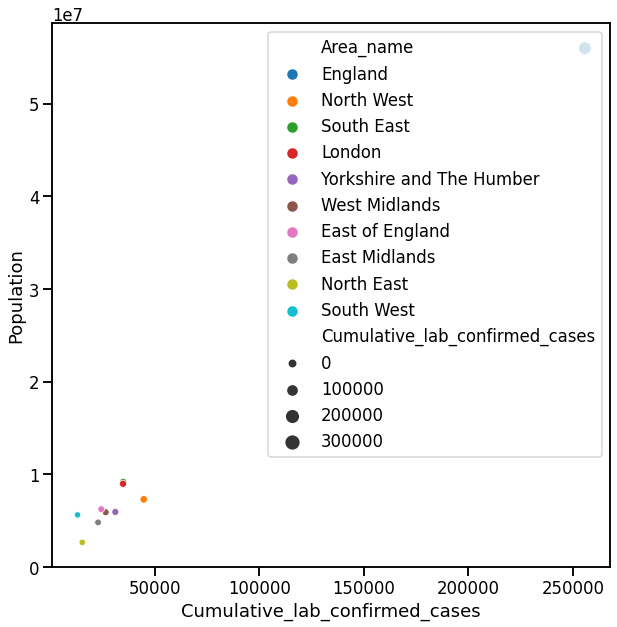

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.scatterplot(x='Cumulative_lab_confirmed_cases', y='Population',size='Cumulative_lab_confirmed_cases',
                data=areas_top_10_copy, hue='Area_name')
plt.legend(loc= 'upper right')

## Scatter-Bubble Plot

In [37]:
alt.Chart(areas_top_10_copy).mark_circle().encode(
    alt.X('Population', scale=alt.Scale(zero=False)),
    alt.Y('Cumulative_lab_confirmed_cases', scale=alt.Scale(zero=False, padding=1)),
    color='Area_name',
    size='Population'
)

alt.Chart(...)

<img src="Img.png">

# Time series analysis is carried out in next Notebook